# Flight Price Prediction
Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

 

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_excel('Data_Train_flight.xlsx')
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Loading test dataset as well

In [3]:
df_test=pd.read_excel('Test_set_flight.xlsx')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [4]:
df_test.shape

(2671, 10)

In [5]:
df_train.shape

(10683, 11)

In [6]:
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


Test dataset has 2671 rows and 10 columns. The price columns we need to predict.

In [7]:
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


All columns have categorical data except the price column which is numerical, which also the target column

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


We will add both the train and test dataset so that we can process all the data processing and cleaning together.

In [10]:
df=df_train.append(df_test, sort="False")

In [11]:
df

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops
0,No info,IndiGo,01:10 22 Mar,24/03/2019,22:20,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,non-stop
1,No info,Air India,13:15,1/05/2019,05:50,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops
2,No info,Jet Airways,04:25 10 Jun,9/06/2019,09:25,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops
3,No info,IndiGo,23:30,12/05/2019,18:05,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,1 stop
4,No info,IndiGo,21:35,01/03/2019,16:50,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1 stop
...,...,...,...,...,...,...,...,...,...,...,...
2666,No info,Air India,20:25 07 Jun,6/06/2019,20:30,Banglore,23h 55m,NaN,CCU → DEL → BLR,Kolkata,1 stop
2667,No info,IndiGo,16:55,27/03/2019,14:20,Banglore,2h 35m,NaN,CCU → BLR,Kolkata,non-stop
2668,No info,Jet Airways,04:25 07 Mar,6/03/2019,21:50,Cochin,6h 35m,NaN,DEL → BOM → COK,Delhi,1 stop
2669,No info,Air India,19:15,6/03/2019,04:00,Cochin,15h 15m,NaN,DEL → BOM → COK,Delhi,1 stop


In [12]:
df.isnull().sum()

Additional_Info       0
Airline               0
Arrival_Time          0
Date_of_Journey       0
Dep_Time              0
Destination           0
Duration              0
Price              2671
Route                 1
Source                0
Total_Stops           1
dtype: int64

2671 null values in Price is of test data which we need to predict. There is one null value of Route and Total stops

Lets check this row.

In [13]:
df[df['Route'].isna()]

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops
9039,No info,Air India,09:25 07 May,6/05/2019,09:45,Cochin,23h 40m,7480.0,NaN,Delhi,NaN


We can observe that the same row has NaN value for route and Total stop. To fill the nan value for route we will see the columns which has source as Delhi and Price as 7480

In [14]:
df.loc[(df["Source"] == 'Delhi' )& (df['Price']==7480)]

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops
1213,No info,Air India,09:25 22 May,21/05/2019,20:40,Cochin,12h 45m,7480.0,DEL → MAA → COK,Delhi,1 stop
1567,No info,Air India,09:25 28 Jun,27/06/2019,20:40,Cochin,12h 45m,7480.0,DEL → MAA → COK,Delhi,1 stop
1595,No info,Air India,09:25 19 May,18/05/2019,20:40,Cochin,12h 45m,7480.0,DEL → MAA → COK,Delhi,1 stop
1616,No info,Air India,09:25 25 May,24/05/2019,09:45,Cochin,23h 40m,7480.0,DEL → MAA → COK,Delhi,1 stop
1725,No info,Air India,09:25 28 May,27/05/2019,17:20,Cochin,16h 5m,7480.0,DEL → MAA → COK,Delhi,1 stop
2554,No info,Air India,09:25 16 May,15/05/2019,09:45,Cochin,23h 40m,7480.0,DEL → MAA → COK,Delhi,1 stop
2842,No info,Air India,09:25 02 May,1/05/2019,20:40,Cochin,12h 45m,7480.0,DEL → MAA → COK,Delhi,1 stop
2862,No info,Air India,09:25 22 May,21/05/2019,17:20,Cochin,16h 5m,7480.0,DEL → MAA → COK,Delhi,1 stop
2927,No info,Air India,09:25 28 May,27/05/2019,06:05,Cochin,27h 20m,7480.0,DEL → MAA → COK,Delhi,1 stop
3341,No info,Air India,09:25 28 Jun,27/06/2019,17:20,Cochin,16h 5m,7480.0,DEL → MAA → COK,Delhi,1 stop


We can see that DEL-MAA-COK is the route where the same fare 7480 is applicable. Hence we will fill the NA values with this route and Total_stops as 1 stop

In [15]:
df.fillna({'Route':'DEL → MAA → COK', 'Total_Stops':'1 stop'}, inplace=True)

In [16]:
df.loc[(df["Source"] == 'Delhi' )& (df['Price']==7480)]

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops
1213,No info,Air India,09:25 22 May,21/05/2019,20:40,Cochin,12h 45m,7480.0,DEL → MAA → COK,Delhi,1 stop
1567,No info,Air India,09:25 28 Jun,27/06/2019,20:40,Cochin,12h 45m,7480.0,DEL → MAA → COK,Delhi,1 stop
1595,No info,Air India,09:25 19 May,18/05/2019,20:40,Cochin,12h 45m,7480.0,DEL → MAA → COK,Delhi,1 stop
1616,No info,Air India,09:25 25 May,24/05/2019,09:45,Cochin,23h 40m,7480.0,DEL → MAA → COK,Delhi,1 stop
1725,No info,Air India,09:25 28 May,27/05/2019,17:20,Cochin,16h 5m,7480.0,DEL → MAA → COK,Delhi,1 stop
2554,No info,Air India,09:25 16 May,15/05/2019,09:45,Cochin,23h 40m,7480.0,DEL → MAA → COK,Delhi,1 stop
2842,No info,Air India,09:25 02 May,1/05/2019,20:40,Cochin,12h 45m,7480.0,DEL → MAA → COK,Delhi,1 stop
2862,No info,Air India,09:25 22 May,21/05/2019,17:20,Cochin,16h 5m,7480.0,DEL → MAA → COK,Delhi,1 stop
2927,No info,Air India,09:25 28 May,27/05/2019,06:05,Cochin,27h 20m,7480.0,DEL → MAA → COK,Delhi,1 stop
3341,No info,Air India,09:25 28 Jun,27/06/2019,17:20,Cochin,16h 5m,7480.0,DEL → MAA → COK,Delhi,1 stop


In [17]:
df.isnull().sum()

Additional_Info       0
Airline               0
Arrival_Time          0
Date_of_Journey       0
Dep_Time              0
Destination           0
Duration              0
Price              2671
Route                 0
Source                0
Total_Stops           0
dtype: int64

There is no Null values now.

In [18]:
df.Additional_Info.value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
Red-eye flight                      1
2 Long layover                      1
1 Short layover                     1
Name: Additional_Info, dtype: int64

In Additional info we can see that No info is repeated twice. Hence we will merge the same.

In [19]:
df['Additional_Info'] = df['Additional_Info'].replace({'No Info': 'No info'})

In [20]:
df.Additional_Info.value_counts()

No info                         10496
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
Red-eye flight                      1
2 Long layover                      1
1 Short layover                     1
Name: Additional_Info, dtype: int64

Lets check the unique values of some of the features.

In [21]:
df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [22]:
df.Arrival_Time.unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '00:20 07 Mar',
       '00:20 02 Apr', '07:45 13 May'], dtype=object)

We can see that arrival time for some of the flights are not updated correctly. Some of the flights along with the arrival time date is also mentioned. We will seperate the date using the split command.

In [23]:
df['ArrivalTime']=df.Arrival_Time.str.split(' ').str[0]

In [24]:
df.ArrivalTime.unique()

array(['01:10', '13:15', '04:25', '23:30', '21:35', '11:25', '10:25',
       '05:05', '19:15', '23:00', '22:55', '13:55', '09:20', '19:50',
       '12:35', '19:20', '13:20', '06:50', '21:50', '08:15', '03:35',
       '12:55', '23:15', '21:00', '20:20', '16:45', '19:00', '18:10',
       '15:15', '08:35', '11:05', '14:15', '10:55', '00:15', '02:45',
       '12:00', '23:55', '01:30', '09:25', '15:25', '15:35', '08:30',
       '10:05', '14:30', '07:55', '10:35', '22:35', '04:40', '07:25',
       '20:45', '14:25', '22:30', '23:20', '07:40', '22:50', '14:35',
       '08:55', '18:50', '09:05', '01:35', '09:40', '16:25', '11:10',
       '17:05', '17:50', '23:10', '08:45', '07:45', '16:10', '00:55',
       '23:35', '20:00', '00:40', '21:45', '18:15', '03:25', '04:15',
       '21:10', '21:05', '09:45', '18:05', '22:00', '15:30', '08:50',
       '08:00', '19:35', '11:20', '10:15', '12:45', '02:20', '07:15',
       '11:50', '18:30', '19:45', '21:20', '20:05', '09:10', '22:20',
       '10:10', '01:

We are able to remove the date from the arrival time. Now we will drop the Arrival_time column.

In [25]:
df.drop(['Arrival_Time'],axis=1,inplace=True)

In [26]:
df.Dep_Time.unique()

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

In [27]:
df.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

We will change the destination value from a city name to the city code. Since Route columns has city code updated. This will help machine to understand both the source and the route correctly.

In [28]:
df['Destination'] = df['Destination'].replace({'New Delhi': 'DEL', 'Banglore':'BLR','Cochin':'COK','Kolkata':'CCU',
                                               'Delhi':'DEL','Hyderabad':'HYD'})

In [29]:
df.Destination.unique()

array(['DEL', 'BLR', 'COK', 'CCU', 'HYD'], dtype=object)

We will do the same for source as well

In [30]:
df.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [31]:
df['Source'] = df['Source'].replace({'Chennai': 'MAA', 'Banglore':'BLR','Kolkata':'CCU',
                                               'Delhi':'DEL','Mumbai':'BOM'})

In [32]:
df.Source.unique()

array(['BLR', 'CCU', 'DEL', 'MAA', 'BOM'], dtype=object)

In [33]:
df

,Additional_Info,Airline,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,ArrivalTime
0,No info,IndiGo,24/03/2019,22:20,DEL,2h 50m,3897.0,BLR → DEL,BLR,non-stop,01:10
1,No info,Air India,1/05/2019,05:50,BLR,7h 25m,7662.0,CCU → IXR → BBI → BLR,CCU,2 stops,13:15
2,No info,Jet Airways,9/06/2019,09:25,COK,19h,13882.0,DEL → LKO → BOM → COK,DEL,2 stops,04:25
3,No info,IndiGo,12/05/2019,18:05,BLR,5h 25m,6218.0,CCU → NAG → BLR,CCU,1 stop,23:30
4,No info,IndiGo,01/03/2019,16:50,DEL,4h 45m,13302.0,BLR → NAG → DEL,BLR,1 stop,21:35
...,...,...,...,...,...,...,...,...,...,...,...
2666,No info,Air India,6/06/2019,20:30,BLR,23h 55m,NaN,CCU → DEL → BLR,CCU,1 stop,20:25
2667,No info,IndiGo,27/03/2019,14:20,BLR,2h 35m,NaN,CCU → BLR,CCU,non-stop,16:55
2668,No info,Jet Airways,6/03/2019,21:50,COK,6h 35m,NaN,DEL → BOM → COK,DEL,1 stop,04:25
2669,No info,Air India,6/03/2019,04:00,COK,15h 15m,NaN,DEL → BOM → COK,DEL,1 stop,19:15


In [34]:
df.Duration.value_counts()

2h 50m     672
1h 30m     493
2h 45m     432
2h 55m     418
2h 35m     399
          ... 
30h 15m      1
35h 20m      1
42h 45m      1
3h 25m       1
32h 25m      1
Name: Duration, Length: 374, dtype: int64

We will change the total duration into mins. For that first we have to split the 'h' and 'm' from the columns and seperate the hour and minutes columns.

In [35]:
df['Duration1']=df.Duration.str.split(' ').str[0]
df['Duration2']=df.Duration.str.split(' ').str[1]

df["Duration1"]= df["Duration1"].str.split("h", n = 1, expand = True)
df["Duration2"]= df["Duration2"].str.split("m", n = 1, expand = True)

In [36]:
df

,Additional_Info,Airline,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,ArrivalTime,Duration1,Duration2
0,No info,IndiGo,24/03/2019,22:20,DEL,2h 50m,3897.0,BLR → DEL,BLR,non-stop,01:10,2,50
1,No info,Air India,1/05/2019,05:50,BLR,7h 25m,7662.0,CCU → IXR → BBI → BLR,CCU,2 stops,13:15,7,25
2,No info,Jet Airways,9/06/2019,09:25,COK,19h,13882.0,DEL → LKO → BOM → COK,DEL,2 stops,04:25,19,NaN
3,No info,IndiGo,12/05/2019,18:05,BLR,5h 25m,6218.0,CCU → NAG → BLR,CCU,1 stop,23:30,5,25
4,No info,IndiGo,01/03/2019,16:50,DEL,4h 45m,13302.0,BLR → NAG → DEL,BLR,1 stop,21:35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,No info,Air India,6/06/2019,20:30,BLR,23h 55m,NaN,CCU → DEL → BLR,CCU,1 stop,20:25,23,55
2667,No info,IndiGo,27/03/2019,14:20,BLR,2h 35m,NaN,CCU → BLR,CCU,non-stop,16:55,2,35
2668,No info,Jet Airways,6/03/2019,21:50,COK,6h 35m,NaN,DEL → BOM → COK,DEL,1 stop,04:25,6,35
2669,No info,Air India,6/03/2019,04:00,COK,15h 15m,NaN,DEL → BOM → COK,DEL,1 stop,19:15,15,15


In [37]:
df.Duration2.unique()

array(['50', '25', nan, '45', '30', '5', '15', '35', '10', '20', '55',
       '40'], dtype=object)

In [38]:
df.Duration1.unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

There is one 5m is showing in duration1 , we will split that too.

In [39]:
df["Duration1"]= df["Duration1"].str.split("m", n = 1, expand = True)

Let's fill the NA values in Duration 2

In [40]:
df['Duration2'] = df['Duration2'].fillna(0)

We will change the columns to numeric features and then mutliply the duartion1 by 60 to convert that into mins and then add the Duration2 column.

In [41]:
df[["Duration1", "Duration2"]] = df[["Duration1", "Duration2"]].apply(pd.to_numeric)
df["Duration1"] = 60* df["Duration1"]
df['Travel_time']=df['Duration1']+df['Duration2']

As we can see that I have created a new column with the total tarvel time in mins.

In [42]:
df

,Additional_Info,Airline,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,ArrivalTime,Duration1,Duration2,Travel_time
0,No info,IndiGo,24/03/2019,22:20,DEL,2h 50m,3897.0,BLR → DEL,BLR,non-stop,01:10,120,50,170
1,No info,Air India,1/05/2019,05:50,BLR,7h 25m,7662.0,CCU → IXR → BBI → BLR,CCU,2 stops,13:15,420,25,445
2,No info,Jet Airways,9/06/2019,09:25,COK,19h,13882.0,DEL → LKO → BOM → COK,DEL,2 stops,04:25,1140,0,1140
3,No info,IndiGo,12/05/2019,18:05,BLR,5h 25m,6218.0,CCU → NAG → BLR,CCU,1 stop,23:30,300,25,325
4,No info,IndiGo,01/03/2019,16:50,DEL,4h 45m,13302.0,BLR → NAG → DEL,BLR,1 stop,21:35,240,45,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,No info,Air India,6/06/2019,20:30,BLR,23h 55m,NaN,CCU → DEL → BLR,CCU,1 stop,20:25,1380,55,1435
2667,No info,IndiGo,27/03/2019,14:20,BLR,2h 35m,NaN,CCU → BLR,CCU,non-stop,16:55,120,35,155
2668,No info,Jet Airways,6/03/2019,21:50,COK,6h 35m,NaN,DEL → BOM → COK,DEL,1 stop,04:25,360,35,395
2669,No info,Air India,6/03/2019,04:00,COK,15h 15m,NaN,DEL → BOM → COK,DEL,1 stop,19:15,900,15,915


Now lets drop the All the duration column.

In [43]:
df.drop(['Duration','Duration1','Duration2'],axis=1,inplace=True)

In [44]:
df.Route.value_counts()

DEL → BOM → COK                3000
BLR → DEL                      1941
CCU → BOM → BLR                1232
CCU → BLR                       896
BOM → HYD                       785
                               ... 
BOM → CCU → HYD                   1
BLR → HBX → BOM → BHO → DEL       1
BOM → UDR → DEL → HYD             1
CCU → IXB → DEL → BLR             1
CCU → VTZ → BLR                   1
Name: Route, Length: 132, dtype: int64

In [45]:
df.Total_Stops.value_counts()

1 stop      7057
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

We will make column for each route the flights take. We will name this as a Via poitns.

Hence we have to create 4 Via points.

In [46]:
df['VIA1']='None'
df['VIA2']='None'
df['VIA3']='None'
df['VIA4']='None'

In [47]:
df

,Additional_Info,Airline,Date_of_Journey,Dep_Time,Destination,Price,Route,Source,Total_Stops,ArrivalTime,Travel_time,VIA1,VIA2,VIA3,VIA4
0,No info,IndiGo,24/03/2019,22:20,DEL,3897.0,BLR → DEL,BLR,non-stop,01:10,170,None,None,None,None
1,No info,Air India,1/05/2019,05:50,BLR,7662.0,CCU → IXR → BBI → BLR,CCU,2 stops,13:15,445,None,None,None,None
2,No info,Jet Airways,9/06/2019,09:25,COK,13882.0,DEL → LKO → BOM → COK,DEL,2 stops,04:25,1140,None,None,None,None
3,No info,IndiGo,12/05/2019,18:05,BLR,6218.0,CCU → NAG → BLR,CCU,1 stop,23:30,325,None,None,None,None
4,No info,IndiGo,01/03/2019,16:50,DEL,13302.0,BLR → NAG → DEL,BLR,1 stop,21:35,285,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,No info,Air India,6/06/2019,20:30,BLR,NaN,CCU → DEL → BLR,CCU,1 stop,20:25,1435,None,None,None,None
2667,No info,IndiGo,27/03/2019,14:20,BLR,NaN,CCU → BLR,CCU,non-stop,16:55,155,None,None,None,None
2668,No info,Jet Airways,6/03/2019,21:50,COK,NaN,DEL → BOM → COK,DEL,1 stop,04:25,395,None,None,None,None
2669,No info,Air India,6/03/2019,04:00,COK,NaN,DEL → BOM → COK,DEL,1 stop,19:15,915,None,None,None,None


To fill the VIA columns, first we need to split the route columns. We will create 4 new columns for route.

In [48]:
df['Route2']=df.Route.str.split(' ').str[2]
df['Route3']=df.Route.str.split(' ').str[4]
df['Route4']=df.Route.str.split(' ').str[6]
df['Route5']=df.Route.str.split(' ').str[8]

If the flight route has more then 1 stop then all the values in Route 2 will be updated in VIA1. Similary if the flight route has more than 2 stop and above, all the vlaues of route 3 wll be updated in VIA2. This is how we are going to fill the values for all the VIA columns.

In [49]:
df['VIA1'] = np.where((df['Total_Stops'] == '1 stop'), df['Route2'], df['VIA1'])
df['VIA1'] = np.where((df['Total_Stops'] == '2 stops'), df['Route2'], df['VIA1'])
df['VIA1'] = np.where((df['Total_Stops'] == '3 stops'), df['Route2'], df['VIA1'])
df['VIA1'] = np.where((df['Total_Stops'] == '4 stops'), df['Route2'], df['VIA1'])

df['VIA2'] = np.where((df['Total_Stops'] == '2 stops'), df['Route3'], df['VIA2'])
df['VIA2'] = np.where((df['Total_Stops'] == '3 stops'), df['Route3'], df['VIA2'])
df['VIA2'] = np.where((df['Total_Stops'] == '4 stops'), df['Route3'], df['VIA2'])

df['VIA3'] = np.where((df['Total_Stops'] == '3 stops'), df['Route4'], df['VIA3'])
df['VIA3'] = np.where((df['Total_Stops'] == '4 stops'), df['Route4'], df['VIA3'])

df['VIA4'] = np.where((df['Total_Stops'] == '4 stops'), df['Route5'], df['VIA4'])

In [50]:
df.loc[df["Total_Stops"] == '4 stops']

,Additional_Info,Airline,Date_of_Journey,Dep_Time,Destination,Price,Route,Source,Total_Stops,ArrivalTime,Travel_time,VIA1,VIA2,VIA3,VIA4,Route2,Route3,Route4,Route5
9182,Change airports,Air India,01/03/2019,05:50,DEL,17686.0,BLR → CCU → BBI → HYD → VGA → DEL,BLR,4 stops,11:20,1770,CCU,BBI,HYD,VGA,CCU,BBI,HYD,VGA
2422,No info,Air India,01/03/2019,05:50,DEL,NaN,BLR → CCU → BBI → HYD → VGA → DEL,BLR,4 stops,22:55,1025,CCU,BBI,HYD,VGA,CCU,BBI,HYD,VGA


In [51]:
df.columns

Index(['Additional_Info', 'Airline', 'Date_of_Journey', 'Dep_Time',
       'Destination', 'Price', 'Route', 'Source', 'Total_Stops', 'ArrivalTime',
       'Travel_time', 'VIA1', 'VIA2', 'VIA3', 'VIA4', 'Route2', 'Route3',
       'Route4', 'Route5'],
      dtype='object')

In [52]:
df.shape

(13354, 19)

Now lets drop the all the routes columns since we have extracted the via points from it.

In [53]:
df.drop(['Route2','Route3','Route4','Route5','Route'],axis=1,inplace=True)

Now from the Date_of_Journey column we will extract the month.

In [54]:
import datetime
df['Month'] = pd.DatetimeIndex(df['Date_of_Journey']).month

In [55]:
df

,Additional_Info,Airline,Date_of_Journey,Dep_Time,Destination,Price,Source,Total_Stops,ArrivalTime,Travel_time,VIA1,VIA2,VIA3,VIA4,Month
0,No info,IndiGo,24/03/2019,22:20,DEL,3897.0,BLR,non-stop,01:10,170,None,None,None,None,3
1,No info,Air India,1/05/2019,05:50,BLR,7662.0,CCU,2 stops,13:15,445,IXR,BBI,None,None,1
2,No info,Jet Airways,9/06/2019,09:25,COK,13882.0,DEL,2 stops,04:25,1140,LKO,BOM,None,None,9
3,No info,IndiGo,12/05/2019,18:05,BLR,6218.0,CCU,1 stop,23:30,325,NAG,None,None,None,12
4,No info,IndiGo,01/03/2019,16:50,DEL,13302.0,BLR,1 stop,21:35,285,NAG,None,None,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,No info,Air India,6/06/2019,20:30,BLR,NaN,CCU,1 stop,20:25,1435,DEL,None,None,None,6
2667,No info,IndiGo,27/03/2019,14:20,BLR,NaN,CCU,non-stop,16:55,155,None,None,None,None,3
2668,No info,Jet Airways,6/03/2019,21:50,COK,NaN,DEL,1 stop,04:25,395,BOM,None,None,None,6
2669,No info,Air India,6/03/2019,04:00,COK,NaN,DEL,1 stop,19:15,915,BOM,None,None,None,6


In [56]:
df['Month'] = df['Month'].replace({1: 'Jan', 2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',
                                  10:'Oct',11:'Nov',12:'Dec'})

In [57]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [58]:
df

,Additional_Info,Airline,Dep_Time,Destination,Price,Source,Total_Stops,ArrivalTime,Travel_time,VIA1,VIA2,VIA3,VIA4,Month
0,No info,IndiGo,22:20,DEL,3897.0,BLR,non-stop,01:10,170,None,None,None,None,Mar
1,No info,Air India,05:50,BLR,7662.0,CCU,2 stops,13:15,445,IXR,BBI,None,None,Jan
2,No info,Jet Airways,09:25,COK,13882.0,DEL,2 stops,04:25,1140,LKO,BOM,None,None,Sep
3,No info,IndiGo,18:05,BLR,6218.0,CCU,1 stop,23:30,325,NAG,None,None,None,Dec
4,No info,IndiGo,16:50,DEL,13302.0,BLR,1 stop,21:35,285,NAG,None,None,None,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,No info,Air India,20:30,BLR,NaN,CCU,1 stop,20:25,1435,DEL,None,None,None,Jun
2667,No info,IndiGo,14:20,BLR,NaN,CCU,non-stop,16:55,155,None,None,None,None,Mar
2668,No info,Jet Airways,21:50,COK,NaN,DEL,1 stop,04:25,395,BOM,None,None,None,Jun
2669,No info,Air India,04:00,COK,NaN,DEL,1 stop,19:15,915,BOM,None,None,None,Jun


We will now split the deaprture time and arrival time as per the time of departure.

In [59]:
df['DepTime']=df.Dep_Time.str.split(':').str[0]
df['ArrTime']=df.ArrivalTime.str.split(':').str[0]

In [60]:
df.head()

,Additional_Info,Airline,Dep_Time,Destination,Price,Source,Total_Stops,ArrivalTime,Travel_time,VIA1,VIA2,VIA3,VIA4,Month,DepTime,ArrTime
0,No info,IndiGo,22:20,DEL,3897.0,BLR,non-stop,01:10,170,None,None,None,None,Mar,22,01
1,No info,Air India,05:50,BLR,7662.0,CCU,2 stops,13:15,445,IXR,BBI,None,None,Jan,05,13
2,No info,Jet Airways,09:25,COK,13882.0,DEL,2 stops,04:25,1140,LKO,BOM,None,None,Sep,09,04
3,No info,IndiGo,18:05,BLR,6218.0,CCU,1 stop,23:30,325,NAG,None,None,None,Dec,18,23
4,No info,IndiGo,16:50,DEL,13302.0,BLR,1 stop,21:35,285,NAG,None,None,None,Jan,16,21


In [61]:
df.drop(['Dep_Time','ArrivalTime'],axis=1,inplace=True)

In [62]:
df

,Additional_Info,Airline,Destination,Price,Source,Total_Stops,Travel_time,VIA1,VIA2,VIA3,VIA4,Month,DepTime,ArrTime
0,No info,IndiGo,DEL,3897.0,BLR,non-stop,170,None,None,None,None,Mar,22,01
1,No info,Air India,BLR,7662.0,CCU,2 stops,445,IXR,BBI,None,None,Jan,05,13
2,No info,Jet Airways,COK,13882.0,DEL,2 stops,1140,LKO,BOM,None,None,Sep,09,04
3,No info,IndiGo,BLR,6218.0,CCU,1 stop,325,NAG,None,None,None,Dec,18,23
4,No info,IndiGo,DEL,13302.0,BLR,1 stop,285,NAG,None,None,None,Jan,16,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,No info,Air India,BLR,NaN,CCU,1 stop,1435,DEL,None,None,None,Jun,20,20
2667,No info,IndiGo,BLR,NaN,CCU,non-stop,155,None,None,None,None,Mar,14,16
2668,No info,Jet Airways,COK,NaN,DEL,1 stop,395,BOM,None,None,None,Jun,21,04
2669,No info,Air India,COK,NaN,DEL,1 stop,915,BOM,None,None,None,Jun,04,19


In [63]:
df[["DepTime", "ArrTime"]] = df[["DepTime", "ArrTime"]].apply(pd.to_numeric)

Lets change the time to Early morning, morning, Noon, Eve and Night.

For that we have to create the function and apply while creating the new column.

In [64]:
def f(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Eve'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

In [65]:
df['Dep'] = df['DepTime'].apply(f)

In [66]:
df['Arr'] = df['ArrTime'].apply(f)

In [67]:
df

,Additional_Info,Airline,Destination,Price,Source,Total_Stops,Travel_time,VIA1,VIA2,VIA3,VIA4,Month,DepTime,ArrTime,Dep,Arr
0,No info,IndiGo,DEL,3897.0,BLR,non-stop,170,None,None,None,None,Mar,22,1,Night,Late Night
1,No info,Air India,BLR,7662.0,CCU,2 stops,445,IXR,BBI,None,None,Jan,5,13,Early Morning,Noon
2,No info,Jet Airways,COK,13882.0,DEL,2 stops,1140,LKO,BOM,None,None,Sep,9,4,Morning,Late Night
3,No info,IndiGo,BLR,6218.0,CCU,1 stop,325,NAG,None,None,None,Dec,18,23,Eve,Night
4,No info,IndiGo,DEL,13302.0,BLR,1 stop,285,NAG,None,None,None,Jan,16,21,Noon,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,No info,Air India,BLR,NaN,CCU,1 stop,1435,DEL,None,None,None,Jun,20,20,Eve,Eve
2667,No info,IndiGo,BLR,NaN,CCU,non-stop,155,None,None,None,None,Mar,14,16,Noon,Noon
2668,No info,Jet Airways,COK,NaN,DEL,1 stop,395,BOM,None,None,None,Jun,21,4,Night,Late Night
2669,No info,Air India,COK,NaN,DEL,1 stop,915,BOM,None,None,None,Jun,4,19,Late Night,Eve


Lets drop the unnecessary column.

In [68]:
df.drop(['DepTime','ArrTime'],axis=1,inplace=True)

In [69]:
df

,Additional_Info,Airline,Destination,Price,Source,Total_Stops,Travel_time,VIA1,VIA2,VIA3,VIA4,Month,Dep,Arr
0,No info,IndiGo,DEL,3897.0,BLR,non-stop,170,None,None,None,None,Mar,Night,Late Night
1,No info,Air India,BLR,7662.0,CCU,2 stops,445,IXR,BBI,None,None,Jan,Early Morning,Noon
2,No info,Jet Airways,COK,13882.0,DEL,2 stops,1140,LKO,BOM,None,None,Sep,Morning,Late Night
3,No info,IndiGo,BLR,6218.0,CCU,1 stop,325,NAG,None,None,None,Dec,Eve,Night
4,No info,IndiGo,DEL,13302.0,BLR,1 stop,285,NAG,None,None,None,Jan,Noon,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,No info,Air India,BLR,NaN,CCU,1 stop,1435,DEL,None,None,None,Jun,Eve,Eve
2667,No info,IndiGo,BLR,NaN,CCU,non-stop,155,None,None,None,None,Mar,Noon,Noon
2668,No info,Jet Airways,COK,NaN,DEL,1 stop,395,BOM,None,None,None,Jun,Night,Late Night
2669,No info,Air India,COK,NaN,DEL,1 stop,915,BOM,None,None,None,Jun,Late Night,Eve


Seasons plays the important role in determining the flight price.

We all know that flight price will be high during Summer and Winter vacations. Generally the fares are lower during the monsoon.

Hence I am going to create a new column as Season and will name it High Low and Shoulder season depending on the month the flight is operating.

In [70]:
df.loc[df['Month'] == 'Jan','Season'] ='High'
df.loc[df['Month'] == 'Feb','Season'] ='Shoulder'
df.loc[df['Month'] == 'Mar','Season'] ='Shoulder'
df.loc[df['Month'] == 'Apr','Season'] ='Shoulder'
df.loc[df['Month'] == 'May','Season'] ='High'
df.loc[df['Month'] == 'Jun','Season'] ='Shoulder'
df.loc[df['Month'] == 'Jul','Season'] ='Low'
df.loc[df['Month'] == 'Aug','Season'] ='Low'
df.loc[df['Month'] == 'Sep','Season'] ='Shoulder'
df.loc[df['Month'] == 'Oct','Season'] ='High'
df.loc[df['Month'] == 'Nov','Season'] ='Shoulder'
df.loc[df['Month'] == 'Dec','Season'] ='High'

In [71]:
df

,Additional_Info,Airline,Destination,Price,Source,Total_Stops,Travel_time,VIA1,VIA2,VIA3,VIA4,Month,Dep,Arr,Season
0,No info,IndiGo,DEL,3897.0,BLR,non-stop,170,None,None,None,None,Mar,Night,Late Night,Shoulder
1,No info,Air India,BLR,7662.0,CCU,2 stops,445,IXR,BBI,None,None,Jan,Early Morning,Noon,High
2,No info,Jet Airways,COK,13882.0,DEL,2 stops,1140,LKO,BOM,None,None,Sep,Morning,Late Night,Shoulder
3,No info,IndiGo,BLR,6218.0,CCU,1 stop,325,NAG,None,None,None,Dec,Eve,Night,High
4,No info,IndiGo,DEL,13302.0,BLR,1 stop,285,NAG,None,None,None,Jan,Noon,Night,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,No info,Air India,BLR,NaN,CCU,1 stop,1435,DEL,None,None,None,Jun,Eve,Eve,Shoulder
2667,No info,IndiGo,BLR,NaN,CCU,non-stop,155,None,None,None,None,Mar,Noon,Noon,Shoulder
2668,No info,Jet Airways,COK,NaN,DEL,1 stop,395,BOM,None,None,None,Jun,Night,Late Night,Shoulder
2669,No info,Air India,COK,NaN,DEL,1 stop,915,BOM,None,None,None,Jun,Late Night,Eve,Shoulder


The next step will be to assign each station with the same numeric value across each columns. e.g. AMD will have a numeric value 1 each column it AMD is there.

This will help machine to undertand the correct source, destination and via points.

In [72]:
df.VIA1.value_counts().sort_index()

AMD      317
ATQ       51
BBI      139
BDQ       46
BHO       66
BLR      294
BOM     4890
CCU       97
COK       19
DED        6
DEL      822
GAU      104
GOI       90
GWL       10
HBX        3
HYD      714
IDR      124
IXA        1
IXB       25
IXC       16
IXR       66
IXU       15
IXZ        1
JAI      341
JDH       49
JLR        1
KNU       12
LKO       72
MAA      328
NAG       98
NDC        1
None    4340
PAT       11
PNQ       77
RPR       23
STV        5
TRV       24
UDR       23
VGA       19
VNS       13
VTZ        1
Name: VIA1, dtype: int64

In [73]:
df.VIA2.value_counts().sort_index()

AMD        53
BBI        18
BHO        14
BOM      1345
CCU         1
COK        95
DEL       150
GAU        15
GOI        23
HBX         8
HYD        16
IDR        19
IMF         5
ISK         5
IXC         3
IXR         3
JAI         1
JDH         7
MAA       102
NAG        33
None    11397
PNQ        11
TIR         1
TRV         3
UDR         4
VGA        18
VTZ         4
Name: VIA2, dtype: int64

In [74]:
df.VIA3.value_counts().sort_index()

AMD         1
BBI         1
BHO         1
BOM        33
DEL         9
GWL         3
HYD         4
NAG         1
None    13296
TRV         5
Name: VIA3, dtype: int64

In [75]:
df.VIA4.value_counts().sort_index()

None    13352
VGA         2
Name: VIA4, dtype: int64

In [76]:
df.Source.value_counts().sort_index()

BLR    2752
BOM     883
CCU    3581
DEL    5682
MAA     456
Name: Source, dtype: int64

In [77]:
df.Destination.value_counts().sort_index()

BLR    3581
CCU     456
COK    5682
DEL    2752
HYD     883
Name: Destination, dtype: int64

After checking all the unique values from all the above destination, I will assign the values as per alphabetical order.

In [78]:
replace_values = {'None':0,
                  'AMD':1,
                  'ATQ':2,
                 'BBI':3,
                 'BDQ':4,
                 'BHO':5,
                 'BLR':6,
                 'BOM':7,
                 'CCU':8,
                 'COK':9,
                 'DED':10,
                 'DEL':11,
                 'GAU':12,
                 'GOI':13,
                 'GWL':14,
                 'HBX':15,
                 'HYD':16,
                 'IDR':17,
                 'IMF':18,
                 'ISK':19,
                 'IXA':20,
                 'IXB':21,
                 'IXC':22,
                 'IXR':23,
                 'IXU':24,
                 'IXZ':25,
                 'JAI':26,
                 'JDH':27,
                 'JLR':28,
                 'KNU':29,
                 'LKO':30,
                 'MAA':31,
                 'NAG':32,
                 'NDC':33,
                 'PAT':34,
                 'PNQ':35,
                 'RPR':36,
                 'STV':37,
                 'TIR':38,
                 'TRV':39,
                 'UDR':40,
                 'VGA':41,
                 'VNS':42,
                 'VTZ':43}

Now lets change the values in each column.

In [79]:
df = df.replace({"VIA1": replace_values})
df = df.replace({"VIA2": replace_values})
df = df.replace({"VIA3": replace_values})
df = df.replace({"VIA4": replace_values})
df = df.replace({"Source": replace_values})
df = df.replace({"Destination": replace_values})

In [80]:
df.VIA4.value_counts()

0     13352
41        2
Name: VIA4, dtype: int64

In [81]:
df

,Additional_Info,Airline,Destination,Price,Source,Total_Stops,Travel_time,VIA1,VIA2,VIA3,VIA4,Month,Dep,Arr,Season
0,No info,IndiGo,11,3897.0,6,non-stop,170,0,0,0,0,Mar,Night,Late Night,Shoulder
1,No info,Air India,6,7662.0,8,2 stops,445,23,3,0,0,Jan,Early Morning,Noon,High
2,No info,Jet Airways,9,13882.0,11,2 stops,1140,30,7,0,0,Sep,Morning,Late Night,Shoulder
3,No info,IndiGo,6,6218.0,8,1 stop,325,32,0,0,0,Dec,Eve,Night,High
4,No info,IndiGo,11,13302.0,6,1 stop,285,32,0,0,0,Jan,Noon,Night,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,No info,Air India,6,NaN,8,1 stop,1435,11,0,0,0,Jun,Eve,Eve,Shoulder
2667,No info,IndiGo,6,NaN,8,non-stop,155,0,0,0,0,Mar,Noon,Noon,Shoulder
2668,No info,Jet Airways,9,NaN,11,1 stop,395,7,0,0,0,Jun,Night,Late Night,Shoulder
2669,No info,Air India,9,NaN,11,1 stop,915,7,0,0,0,Jun,Late Night,Eve,Shoulder


# Visualization of the data

In [82]:
df.columns

Index(['Additional_Info', 'Airline', 'Destination', 'Price', 'Source',
       'Total_Stops', 'Travel_time', 'VIA1', 'VIA2', 'VIA3', 'VIA4', 'Month',
       'Dep', 'Arr', 'Season'],
      dtype='object')

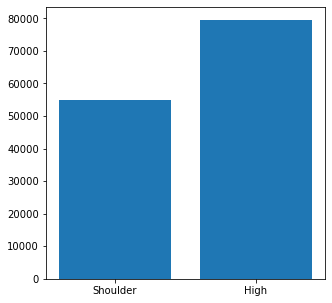

In [83]:
fig = plt.figure(figsize =(5,5))
plt.bar(df['Season'], df['Price'])
plt.show()

Since there is no data from the month that makes the low season, we can clearly see that price of the ticket is high during the High Season

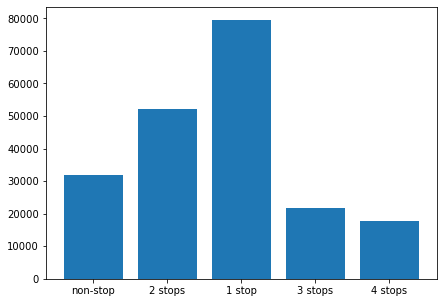

In [84]:
fig = plt.figure(figsize =(7,5))
plt.bar(df['Total_Stops'], df['Price'])
plt.show()

Flight with 1 stop has the higher price. 

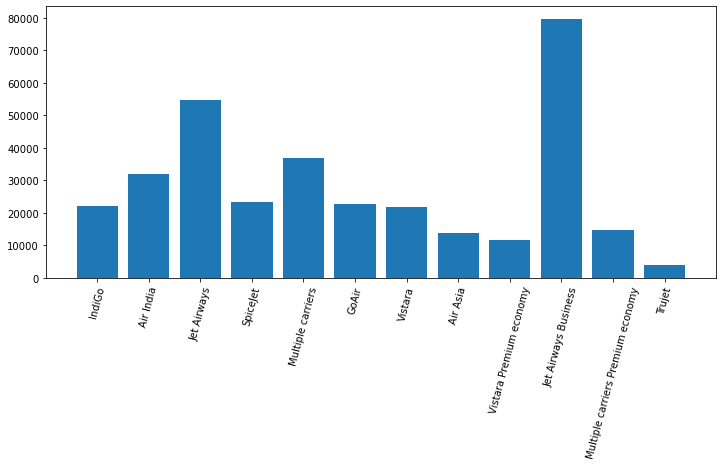

In [85]:
fig = plt.figure(figsize =(12,5))
plt.bar(df['Airline'], df['Price'])
plt.xticks(rotation=75)
plt.show()

We can observe that fares are high for Jet airways business. Truejet has the the lowest price.

In [86]:
df.Source.unique()

array([ 6,  8, 11, 31,  7], dtype=int64)

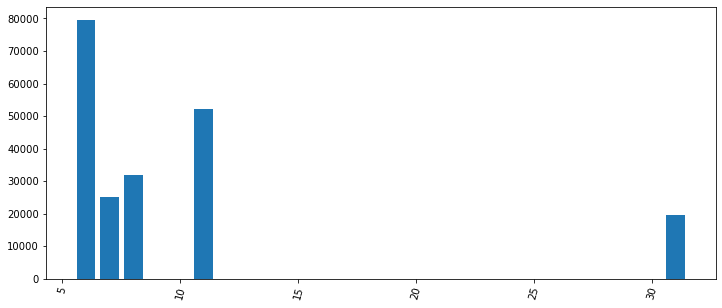

In [87]:
fig = plt.figure(figsize =(12,5))
plt.bar(df['Source'], df['Price'])
plt.xticks(rotation=75)
plt.show()

Price will be higher if the Source is 6 which is BLR.

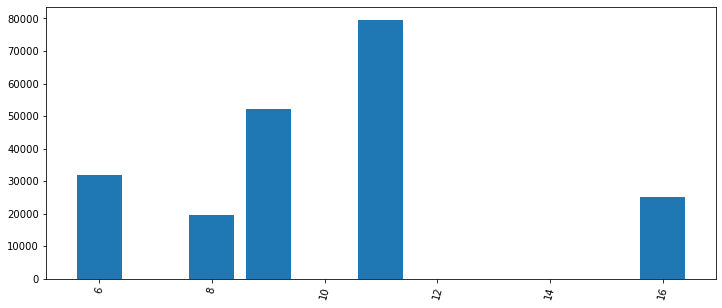

In [88]:
fig = plt.figure(figsize =(12,5))
plt.bar(df['Destination'], df['Price'])
plt.xticks(rotation=75)
plt.show()

Destination delhi will have the higher ticket Price.

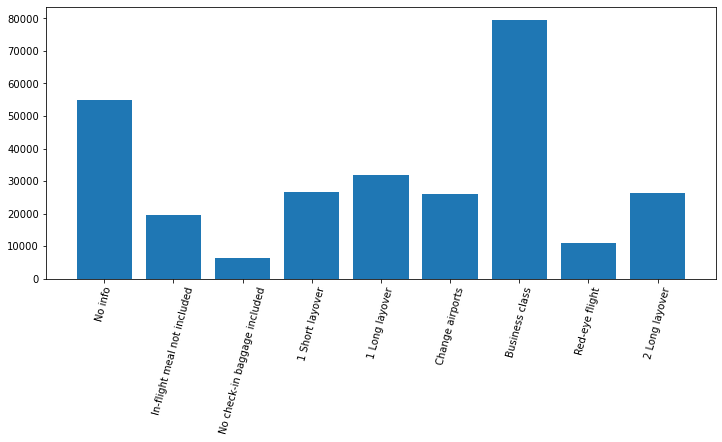

In [89]:
fig = plt.figure(figsize =(12,5))
plt.bar(df['Additional_Info'], df['Price'])
plt.xticks(rotation=75)
plt.show()

Additional_Info also show that price is higher for business class and the lowest for No check-in bagagge.

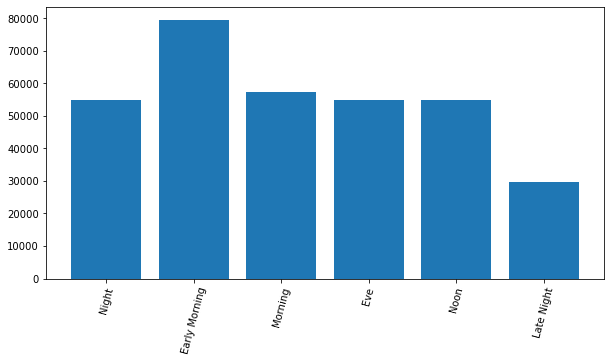

In [90]:
fig = plt.figure(figsize =(10,5))
plt.bar(df['Dep'], df['Price'])
plt.xticks(rotation=75)
plt.show()

Flights deaprting early morning tends to have the higher price. Lowest price is available for the fligts departing late night

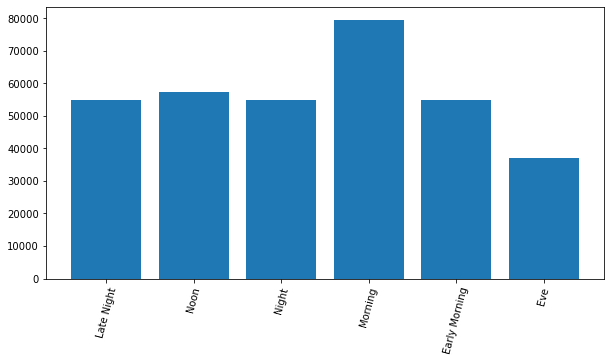

In [91]:
fig = plt.figure(figsize =(10,5))
plt.bar(df['Arr'], df['Price'])
plt.xticks(rotation=75)
plt.show()

Flights arriving in the morning have higher price.

<AxesSubplot:xlabel='Price', ylabel='Travel_time'>

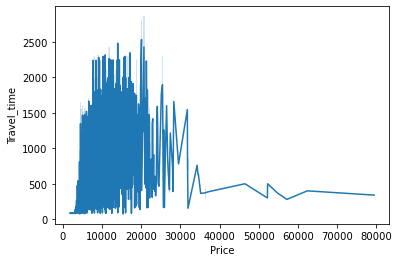

In [92]:
sns.lineplot(x='Price',y='Travel_time',data=df)

There is no corelation we can find with travel time and price.

# Since all of our feature is categorical we will not be checking the skewness and outliers in this dataset.

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Additional_Info  13354 non-null  object 
 1   Airline          13354 non-null  object 
 2   Destination      13354 non-null  int64  
 3   Price            10683 non-null  float64
 4   Source           13354 non-null  int64  
 5   Total_Stops      13354 non-null  object 
 6   Travel_time      13354 non-null  int64  
 7   VIA1             13354 non-null  int64  
 8   VIA2             13354 non-null  int64  
 9   VIA3             13354 non-null  int64  
 10  VIA4             13354 non-null  int64  
 11  Month            13354 non-null  object 
 12  Dep              13354 non-null  object 
 13  Arr              13354 non-null  object 
 14  Season           13354 non-null  object 
dtypes: float64(1), int64(7), object(7)
memory usage: 1.6+ MB


Now we will be changing all the categorical feature to numerical.

In [94]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in df.columns:
    if df[i].dtypes==object:
        df[i]=le.fit_transform(df[i])

In [95]:
df

,Additional_Info,Airline,Destination,Price,Source,Total_Stops,Travel_time,VIA1,VIA2,VIA3,VIA4,Month,Dep,Arr,Season
0,7,3,11,3897.0,6,4,170,0,0,0,0,4,4,2,1
1,7,1,6,7662.0,8,1,445,23,3,0,0,2,0,5,0
2,7,4,9,13882.0,11,1,1140,30,7,0,0,6,3,2,1
3,7,3,6,6218.0,8,0,325,32,0,0,0,1,1,4,0
4,7,3,11,13302.0,6,0,285,32,0,0,0,2,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,7,1,6,NaN,8,0,1435,11,0,0,0,3,1,1,1
2667,7,3,6,NaN,8,4,155,0,0,0,0,4,5,5,1
2668,7,4,9,NaN,11,0,395,7,0,0,0,3,4,2,1
2669,7,1,9,NaN,11,0,915,7,0,0,0,3,2,1,1


We are now going to split the data between input and target variable.

In [96]:
x=df.drop(['Price'],axis=1)
y=df['Price']
y=pd.DataFrame(data=y)

We will bring our data to the standard scale using Standard Scaler

In [97]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x)
sc_x=pd.DataFrame(sc_x,columns=x.columns)

Sperating the test dataset.

In [98]:
df_test=sc_x[10683:]

In [99]:
df_test

,Additional_Info,Airline,Destination,Source,Total_Stops,Travel_time,VIA1,VIA2,VIA3,VIA4,Month,Dep,Arr,Season
10683,0.494309,0.009693,-0.014263,0.314561,-0.804292,0.024737,-0.054777,-0.316514,-0.051105,-0.012239,-0.362786,-0.622787,-0.274452,0.789300
10684,0.494309,-0.413335,-1.190003,-0.351679,-0.804292,-0.794364,2.768591,-0.316514,-0.051105,-0.012239,-1.595363,-1.169362,0.383661,-1.266945
10685,-1.931639,0.009693,-0.014263,0.314561,-0.804292,1.544514,-0.054777,-0.316514,-0.051105,-0.012239,0.869791,-0.622787,-0.932566,-1.266945
10686,0.494309,0.855750,-0.014263,0.314561,-0.804292,0.271454,-0.054777,-0.316514,-0.051105,-0.012239,0.869791,-1.169362,1.041775,-1.266945
10687,0.494309,-1.682420,0.769564,-0.795839,1.412876,-0.932525,-0.878259,-0.316514,-0.051105,-0.012239,-0.362786,1.016940,-0.274452,0.789300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,0.494309,-1.259391,-1.190003,-0.351679,-0.804292,1.564251,0.415785,-0.316514,-0.051105,-0.012239,-0.362786,-0.622787,-0.932566,0.789300
13350,0.494309,-0.413335,-1.190003,-0.351679,1.412876,-0.962131,-0.878259,-0.316514,-0.051105,-0.012239,0.253503,1.563515,1.699888,0.789300
13351,0.494309,0.009693,-0.014263,0.314561,-0.804292,-0.488435,-0.054777,-0.316514,-0.051105,-0.012239,-0.362786,1.016940,-0.274452,0.789300
13352,0.494309,-1.259391,-0.014263,0.314561,-0.804292,0.537908,-0.054777,-0.316514,-0.051105,-0.012239,-0.362786,-0.076211,-0.932566,0.789300


In [100]:
x=sc_x[0:10683]
x

,Additional_Info,Airline,Destination,Source,Total_Stops,Travel_time,VIA1,VIA2,VIA3,VIA4,Month,Dep,Arr,Season
0,0.494309,-0.413335,0.769564,-0.795839,1.412876,-0.932525,-0.878259,-0.316514,-0.051105,-0.012239,0.253503,1.016940,-0.274452,0.789300
1,0.494309,-1.259391,-1.190003,-0.351679,-0.250000,-0.389748,1.827469,0.328919,-0.051105,-0.012239,-0.979075,-1.169362,1.699888,-1.266945
2,0.494309,0.009693,-0.014263,0.314561,-0.250000,0.981999,2.650951,1.189497,-0.051105,-0.012239,1.486080,0.470364,-0.274452,0.789300
3,0.494309,-0.413335,-1.190003,-0.351679,-0.804292,-0.626596,2.886232,-0.316514,-0.051105,-0.012239,-1.595363,-0.622787,1.041775,-1.266945
4,0.494309,-0.413335,0.769564,-0.795839,-0.804292,-0.705546,2.886232,-0.316514,-0.051105,-0.012239,-0.979075,1.563515,1.041775,-1.266945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.494309,-1.682420,-1.190003,-0.351679,1.412876,-0.972000,-0.878259,-0.316514,-0.051105,-0.012239,1.486080,-0.622787,1.041775,0.789300
10679,0.494309,-1.259391,-1.190003,-0.351679,1.412876,-0.962131,-0.878259,-0.316514,-0.051105,-0.012239,-2.211652,-0.622787,1.041775,0.789300
10680,0.494309,0.009693,0.769564,-0.795839,1.412876,-0.912788,-0.878259,-0.316514,-0.051105,-0.012239,-2.211652,-1.169362,0.383661,0.789300
10681,0.494309,2.547863,0.769564,-0.795839,1.412876,-0.952263,-0.878259,-0.316514,-0.051105,-0.012239,-0.979075,0.470364,1.699888,-1.266945


Dropping all the NA values from y

In [101]:
y.dropna(how='all',axis=0,inplace=True)

In [102]:
x.shape, y.shape

((10683, 14), (10683, 1))

# Model Fitting and Selection

Importing all the libraries for model fitting and cross validation.

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

We will check the best possible random state to train our model. Using LinearRegression to check and then later will run with other models.

In [104]:
MaX_r2_score=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    r2_scores = r2_score(y_test,y_pred)
    if r2_scores>MaX_r2_score:
        MaX_r2_score = r2_scores
        random_state = i
    
print("MaX R2 score corresponding to random state",random_state,"is",MaX_r2_score)

MaX R2 score corresponding to random state 64 is 0.4650752545494271


We can see that the best random state is 64. We will split the data with this random state.

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=64)

Checking the best kernellist for SVR model

In [106]:
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.3171698828166928
0.041526560034121696
0.05128086411536492


We will select linear for testing the model

Fitting the data to various model and checking the accuracy

In [107]:
sv=SVR(kernel='linear')
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
kn=KNeighborsRegressor()
ab=AdaBoostRegressor()
gb=GradientBoostingRegressor()
ls=Lasso()
rd=Ridge()

model=[lr,sv,dt,rf,kn,ab,gb,ls,rd]
kf = KFold(n_splits=5, random_state=54, shuffle=True)

train=[]
test=[]
Mse=[]
cv=[]

for m in model:
    m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    train_score=r2_score(y_train,pred_train)
    train.append(train_score*100)
    test_score=r2_score(y_test,pred_test)
    test.append(test_score*100)
    mse = mean_squared_error(y_test,pred_test)
    Mse.append(mse)
    score=cross_val_score(m,x,y,cv=kf)
    cv.append(score.mean()*100)
    
Performance={'Model':['Linear Regression','SupportVector','DecisionTree','RandomForest','KNN','AdaBoost','GradientBoosting','Lasso','Ridge'],
             'Training Score':train,
            'Test Score':test,
            'Mean Square Error':Mse,
            'Cross Validation Score': cv}
Performance=pd.DataFrame(data=Performance)
Performance

,Model,Training Score,Test Score,Mean Square Error,Cross Validation Score
0,Linear Regression,38.344875,46.507525,1.000193e+07,39.799536
1,SupportVector,31.716988,40.886709,1.105290e+07,33.324134
2,DecisionTree,94.653248,72.618440,5.119754e+06,67.249279
3,RandomForest,92.776509,77.906431,4.131015e+06,75.842036
4,KNN,78.974798,69.662527,5.672446e+06,68.133289
5,AdaBoost,31.454137,24.200331,1.417288e+07,31.877544
6,GradientBoosting,76.526449,75.763667,4.531665e+06,74.443684
7,Lasso,38.344784,46.507591,1.000191e+07,39.799600
8,Ridge,38.344874,46.508001,1.000184e+07,39.799571


Observation

1. GradientBoosting model has performed well with least difference between test and CV score.

2. GradientBoosting test accuracy is 75% with CV score of 74%

3. RandomForest has given us the best test accuracy of 78% with CV score of 76%

We will select this as our final model and Hypertune it

# HyperTuning

In [108]:
from sklearn.model_selection import GridSearchCV

Hypertuning of GradientBoostingRegressor

In [111]:
params = {'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    'max_depth':[3,5,8],
    'n_estimators':[100,200,300,500]}

In [112]:
grid_search=GridSearchCV(gb,params,verbose=4,refit=True,cv = 5,n_jobs = -1)

In [113]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15,
                                           0.2],
                         'max_depth': [3, 5, 8],
                         'n_estimators': [100, 200, 300, 500]},
             verbose=4)

In [114]:
Finalmod=GradientBoostingRegressor(learning_rate=0.15,max_depth=3,n_estimators=500)
Finalmod.fit(x_train,y_train)
pred_test=Finalmod.predict(x_test)
R2=r2_score(y_test,pred_test)
scores=cross_val_score(Finalmod,x,y,cv=kf)
MSE = mean_squared_error(y_test,pred_test)
print('GradientBoostingRegressor Performance')
print('---------------------------------------------------')
print('Accuracy Score', R2*100)
print('Cross Validation score',scores.mean()*100)
print('Mean Square Error',MSE)

GradientBoostingRegressor Performance
---------------------------------------------------
Accuracy Score 79.24078414511571
Cross Validation score 79.52604695890123
Mean Square Error 3881520.4319738327


We can observe that accuracy of GradientBoosting has improved a lot with test and CV score of 79%

Hypertuning of RandomForestRegressor

In [117]:
params1 = {'max_depth': [10, 20, 30, 40, None],
                  'max_features': ['auto', 'sqrt'],
                  'min_samples_leaf': [1, 2, 4],
                  'min_samples_split': [2, 5, 10],
                  'n_estimators': [5, 10, 20, 30, 50]}

In [119]:
grid_search=GridSearchCV(rf,params1,verbose=4,refit=True,cv = 5,n_jobs = -1)

In [120]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [5, 10, 20, 30, 50]},
             verbose=4)

In [121]:
Finalmod1=RandomForestRegressor(max_depth= None, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 5, n_estimators= 50)
Finalmod1.fit(x_train,y_train)
pred_test1=Finalmod1.predict(x_test)
RF_R2=r2_score(y_test,pred_test1)
RF_scores=cross_val_score(Finalmod1,x,y,cv=kf)
RF_MSE = mean_squared_error(y_test,pred_test1)
print('RandomForestRegressor Performance')
print('---------------------------------------------------')
print('Accuracy Score', RF_R2*100)
print('Cross Validation score',RF_scores.mean()*100)
print('Mean Square Error',RF_MSE)

RandomForestRegressor Performance
---------------------------------------------------
Accuracy Score 79.25313436081503
Cross Validation score 78.0797884311623
Mean Square Error 3879211.211100016


The test accuracy has improved with 79% and CV score of 78%

We will select GradientBoostingRegressor as our final model since it has no difference between test and CV score.

Plotting the model

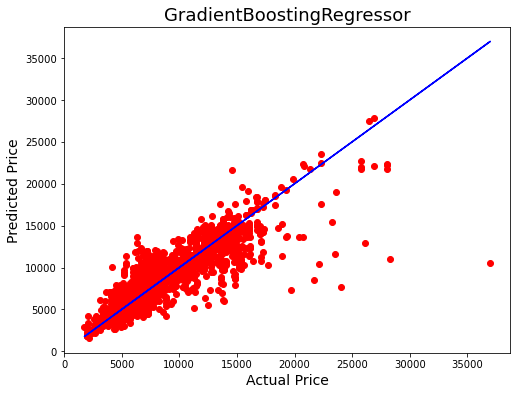

In [122]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('GradientBoostingRegressor',fontsize=18)
plt.show()

Checking the model on Test data

In [123]:
test_data=Finalmod.predict(df_test)

In [124]:
Price=pd.DataFrame(data=test_data)

In [125]:
Price

,0
0,14009.965651
1,4383.100675
2,12270.381357
3,10418.193880
4,4440.474419
...,...
2666,9686.053410
2667,5386.096979
2668,14677.007133
2669,9538.106273


We are able to predict the price sucessfully.

Let's save the model

In [126]:
import joblib
joblib.dump(Finalmod,'Flight_price.obj')

['Flight_price.obj']